# *Computers, Pattern, Chaos, and Beauty: Graphics from an Unseen World* by Clifford A. Pickover 

### Dependencies

In [50]:
#r "nuget: SkiaSharp"

Installed Packages SkiaSharp, 2.88.3

In [51]:
open SkiaSharp

#### Figure 10.20 and Pseudocode 10.4


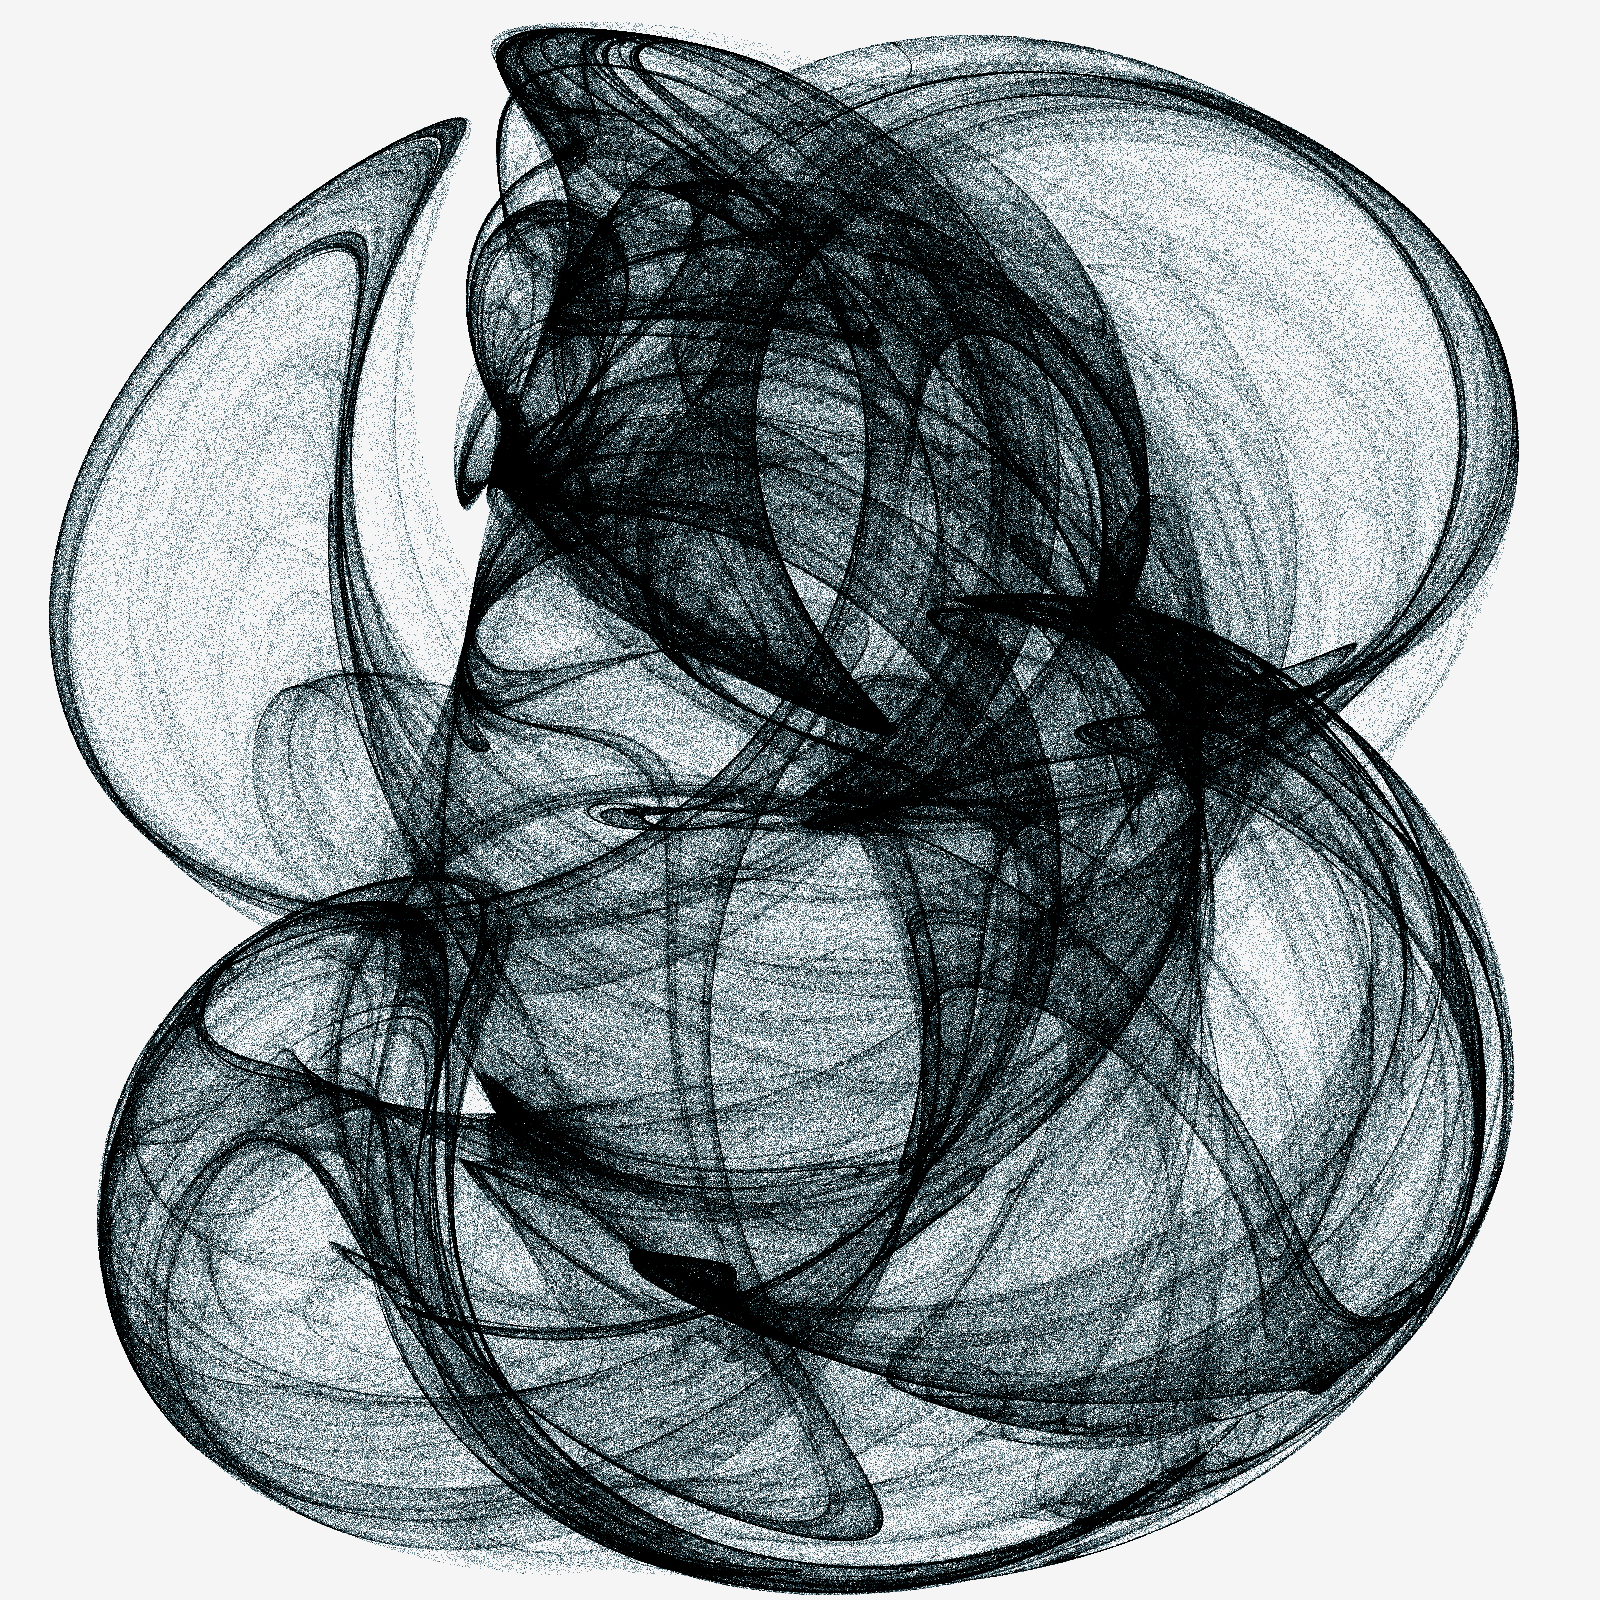

In [52]:
let xxmin = -2.0
let xxmax = 2.0
let yymin = -2.0
let yymax = 2.0
let pres  = 1600.0
let iter1 = 1000
let iter2 = 5000

let xinc = pres / (xxmax - xxmin)
let yinc = pres / (yymax - yymin)

let a = 2.24
let b = 0.43
let c = -0.65
let d = -2.43
let e = 1.0

let mutable x, y, z = 0.0, 0.0, 0.0
let mutable xx, yy, zz = 0.0, 0.0, 0.0
let mutable xxx, yyy, zzz = 0.0, 0.0, 0.0

let mutable p = Array2D.create (int pres) (int pres) 0.0

for j in 1 .. iter1 do
    for i in 1 .. iter2 do
        xx <- sin (a * y) - z * cos (b * x)
        yy <- z * sin (c * x) - cos (d * y)
        zz <- e * sin x

        x <- xx
        y <- yy
        z <- zz
        if xx < xxmax && xx > xxmin && yy < yymax && yy > yymin then
            xxx <- (xx - xxmin) * xinc
            yyy <- (yy - yymin) * yinc
            p[int xxx, int yyy] <- p[int xxx, int yyy] + 1.0

let width, height = int pres, int pres

let bitmap = new SKBitmap(width, height)
let canvas = new SKCanvas(bitmap)
let paint = new SKPaint(Color = SKColors.Black.WithAlpha(255uy))
canvas.Clear(SKColors.WhiteSmoke)

// Transform the axis to match the book
canvas.RotateDegrees(90.0f)
canvas.Scale(-1.0f, 1.0f)
canvas.Translate(-float32 width, -float32 height)

// Convert the 2D array to a 1D sequence to be able to easily calculate the maximum
// and minimum values
let allElements = seq { for x in p -> x :?> float }

// These calculations can help scale the alpha values of the colors to get a nice
// looking picture
let minimum = Seq.min allElements
let maximum = Seq.max allElements
let threshold = 5.0
let multiplier = 254.0 / threshold

for i in 1..(int pres) do
    for j in 1..(int pres) do
        let alpha = (min threshold p[i-1, j-1]) * multiplier |> byte
        let paint = new SKPaint(Color = SKColors.DeepSkyBlue.WithAlpha alpha)
        let point = SKPoint(float32 i, float32 j)
        canvas.DrawPoint(point, paint)
        let paint = new SKPaint(Color = SKColors.Black.WithAlpha alpha)
        let point = SKPoint(float32 i, float32 j)
        canvas.DrawPoint(point, paint)
        let paint = new SKPaint(Color = SKColors.Black.WithAlpha alpha)
        let point = SKPoint(float32 i, float32 j)
        canvas.DrawPoint(point, paint)

bitmap


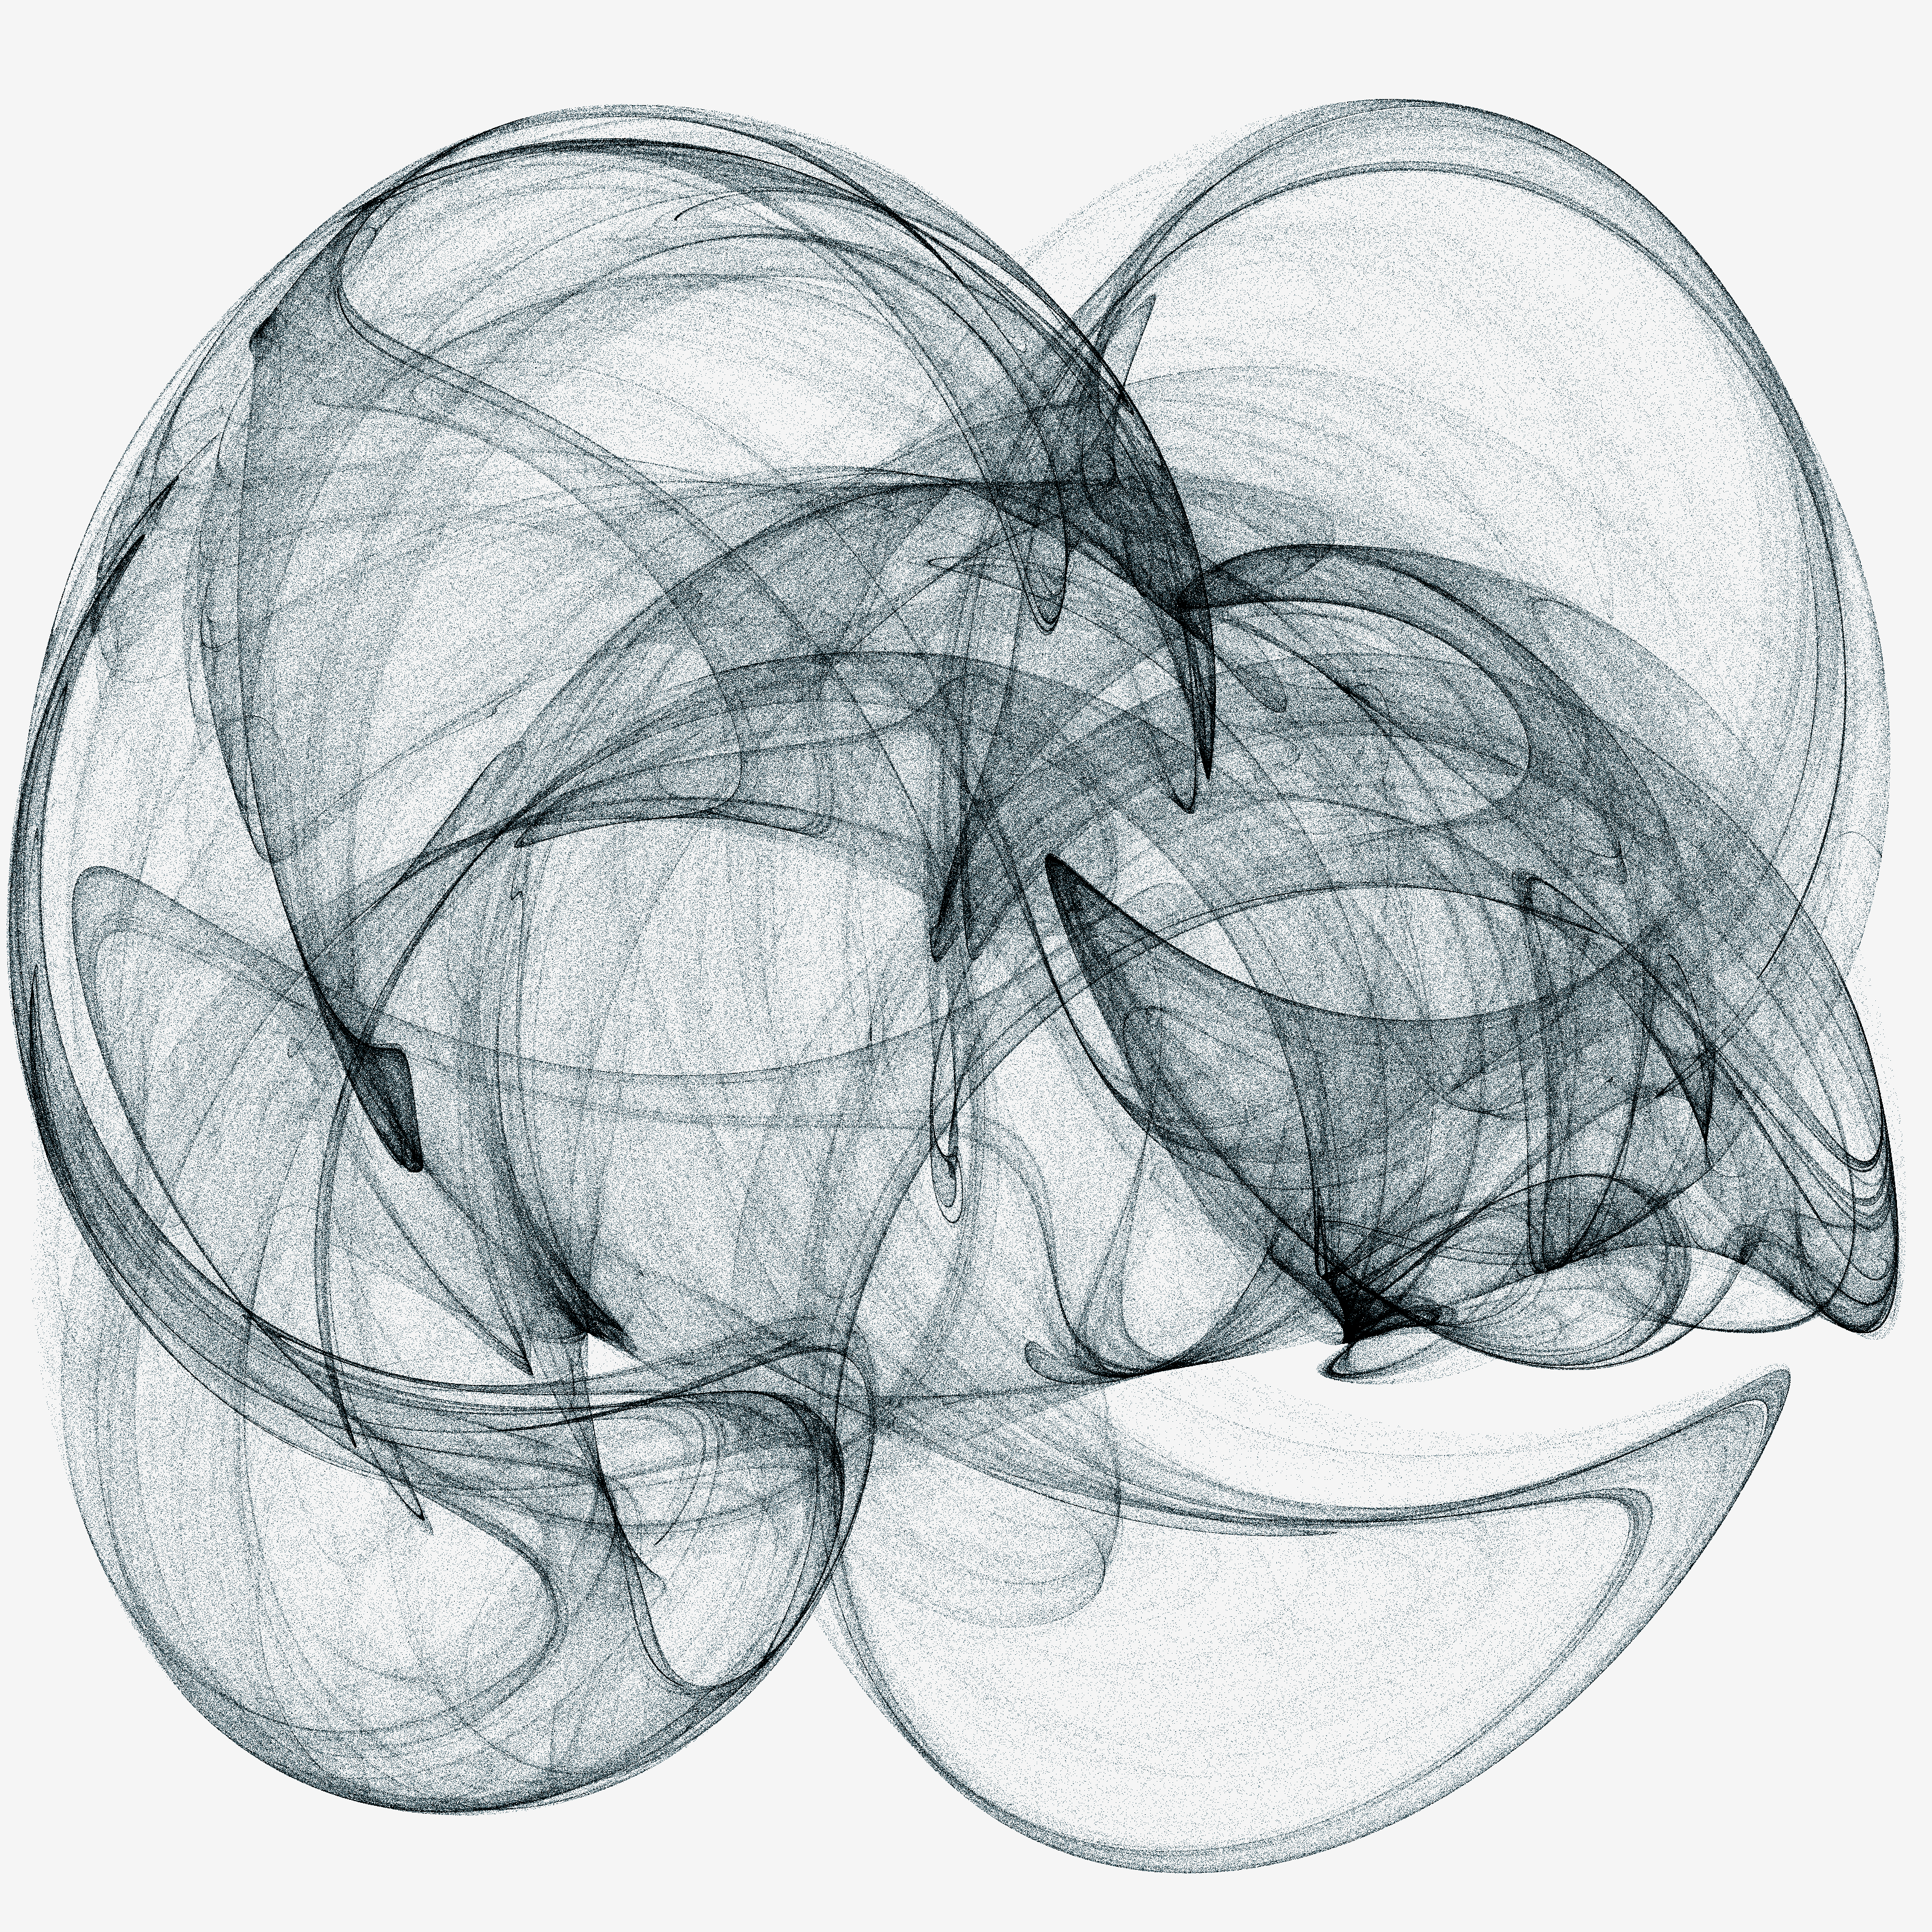

In [53]:
let xxmin = -2.0
let xxmax = 2.0
let yymin = -2.0
let yymax = 2.0
let pres  = 3200.0 // adjusted from the book's value of 1600
let iter1 = 1000
let iter2 = 5000

let xinc = pres / (xxmax - xxmin)
let yinc = pres / (yymax - yymin)

let a = 2.24
let b = 0.43
let c = -0.65
let d = -2.43
let e = 1.0

let mutable x, y, z = 0.0, 0.0, 0.0
let mutable xx, yy, zz = 0.0, 0.0, 0.0
let mutable xxx, yyy, zzz = 0.0, 0.0, 0.0

let mutable p = Array2D.create (int pres) (int pres) 0.0

for j in 1 .. iter1 do
    for i in 1 .. iter2 do
        xx <- sin (a * y) - z * cos (b * x)
        yy <- z * sin (c * x) - cos (d * y)
        zz <- e * sin x

        x <- xx
        y <- yy
        z <- zz
        if xx < xxmax && xx > xxmin && yy < yymax && yy > yymin then
            xxx <- (xx - xxmin) * xinc
            yyy <- (yy - yymin) * yinc
            p[int xxx, int yyy] <- p[int xxx, int yyy] + 5.0

let width, height = int pres, int pres

let bitmap = new SKBitmap(width, height)
let canvas = new SKCanvas(bitmap)
let paint = new SKPaint(Color = SKColors.Black.WithAlpha(255uy))
canvas.Clear(SKColors.WhiteSmoke)

// // Transform the axis to match the book
// canvas.RotateDegrees(90.0f)
// canvas.Scale(-1.0f, 1.0f)
// canvas.Translate(-float32 width, -float32 height)

// Convert the 2D array to a 1D sequence to be able to easily calculate the maximum
// and minimum values
let allElements = seq { for x in p -> x :?> float }

// These calculations can help scale the alpha values of the colors to get a nice
// looking picture
let minimum = Seq.min allElements
let maximum = Seq.max allElements
let threshold = 20.0
let multiplier = 254.0 / threshold

for i in 1..(int pres) do
    for j in 1..(int pres) do
        let alpha = (min threshold p[i-1, j-1]) * multiplier |> byte
        let paint = new SKPaint(Color = SKColors.DeepSkyBlue.WithAlpha alpha)
        let point = SKPoint(float32 i, float32 j)
        canvas.DrawPoint(point, paint)
        let paint = new SKPaint(Color = SKColors.Black.WithAlpha alpha)
        let point = SKPoint(float32 i, float32 j)
        canvas.DrawPoint(point, paint)
        let paint = new SKPaint(Color = SKColors.Black.WithAlpha alpha)
        let point = SKPoint(float32 i, float32 j)
        canvas.DrawPoint(point, paint)

bitmap